<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# ** Laboratorio práctico: análisis de datos exploratorios: conjunto de datos de precios de computadoras portátiles **

Se necesita tiempo estimado: ** 45 ** minutos

En este laboratorio, utilizará las habilidades adquiridas en todo el módulo, para explorar el efecto de diferentes características en el precio de las computadoras portátiles.

# Objetivos

Después de completar este laboratorio, podrá:

- Visualizar patrones de características individuales
- Ejecutar análisis estadístico descriptivo en el conjunto de datos
- Use grupos y tablas de pivote para encontrar el efecto de las variables categóricas en el precio
- Use la correlación de Pearson para medir la interdependencia entre las variables

# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [ ]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

Import the file to a pandas dataframe.


In [3]:
df = pd.read_csv(filepath, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

In [6]:
from dataclasses import dataclass

@dataclass
class A:
    unnamed_0_1: str = "Unnamed: 0.1"
    unnamed_0: str = "Unnamed: 0"
    manufacturer: str = "Manufacturer"
    category: str = "Category"
    gpu: str = "GPU"
    os: str = "OS"
    cpu_core: str = "CPU_core"
    screen_size_inch: str = "Screen_Size_inch"
    cpu_frequency: str = "CPU_frequency"
    ram_gb: str = "RAM_GB"
    storage_gb_ssd: str = "Storage_GB_SSD"
    weight_pounds: str = "Weight_pounds"
    price: str = "Price"
    price_binned: str = "Price-binned"
    screen_full_hd: str = "Screen-Full_HD"
    screen_ips_panel: str = "Screen-IPS_panel"


Print the first 5 entries of the dataset to confirm loading.


In [7]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Tarea 1 - Visualizar patrones de características individuales

### Características valoradas continuas
Genere gráficos de regresión para cada uno de los parámetros "CPU_Frequency", "Screen_Size_inch" y "Weight_Pounds" contra "precio".Además, imprima el valor de la correlación de cada característica con "precio".

(0.0, 3974.15)

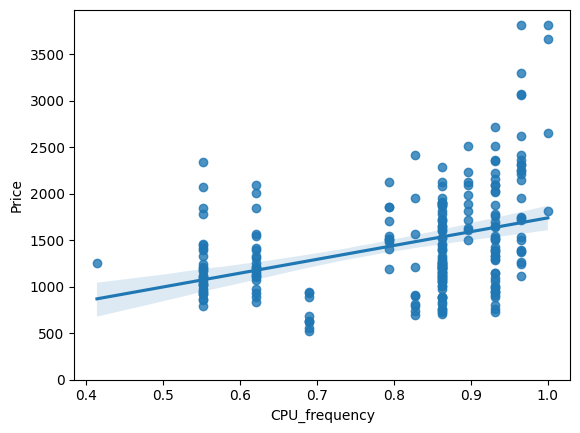

In [13]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(x=A.cpu_frequency, y= A.price, data=df)
plt.ylim(0,)


<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

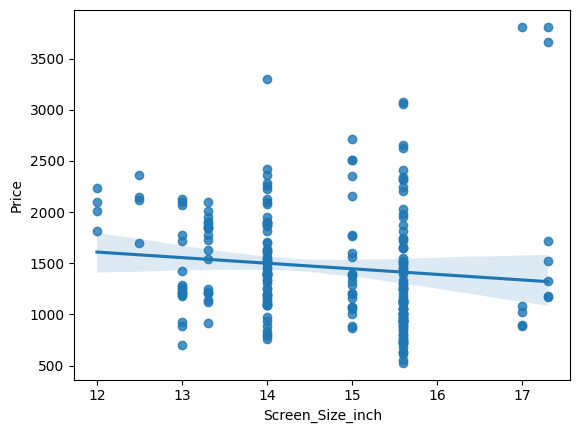

In [14]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x=A.screen_size_inch, y= A.price, data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Weight_pounds', ylabel='Price'>

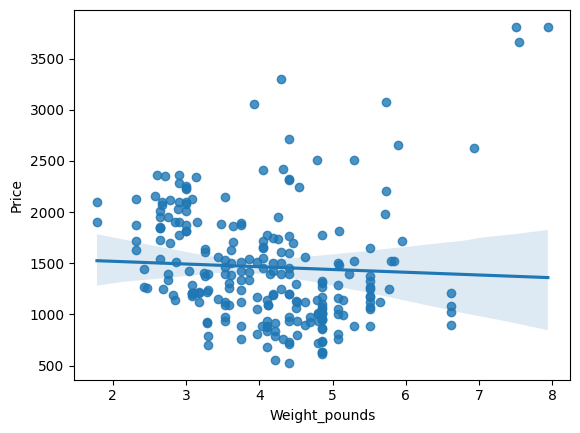

In [15]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x=A.weight_pounds, y= A.price, data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [16]:
# Correlation values of the three attributes with Price
col_eval = [A.cpu_frequency, A.screen_size_inch, A.weight_pounds]
for col in col_eval:
    pearson_coef, p_value = stats.pearsonr(df[col], df[A.price])
    print( col , "::: ", pearson_coef, " with a P-value of P = ", p_value ) 

CPU_frequency :::  0.36666555892588615  with a P-value of P =  5.502463350713219e-09
Screen_Size_inch :::  -0.11064420817118273  with a P-value of P =  0.0885339784683062
Weight_pounds :::  -0.05031225837751551  with a P-value of P =  0.43976938534338894


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretación: "CPU_Frequency" tiene una correlación positiva del 36% con el precio de las computadoras portátiles.Los otros dos parámetros tienen una correlación débil con el precio.

### Características categóricas
Genere gráficos de caja para la característica diferente que contienen valores categóricos.Estas características serían "categoría", "GPU", "OS", "CPU_Core", "Ram_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

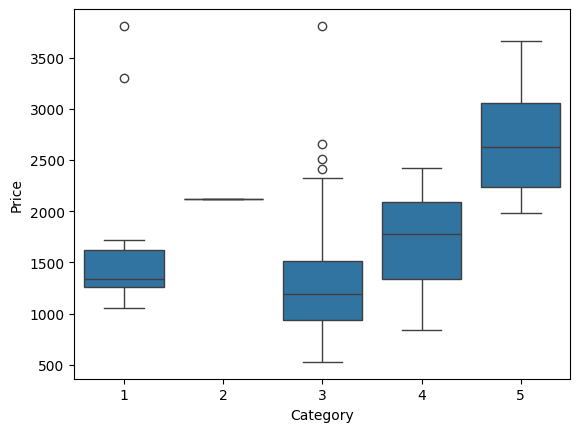

In [17]:
# Write your code below and press Shift+Enter to execute
# Category Box plot

sns.boxplot(x=A.category, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<Axes: xlabel='GPU', ylabel='Price'>

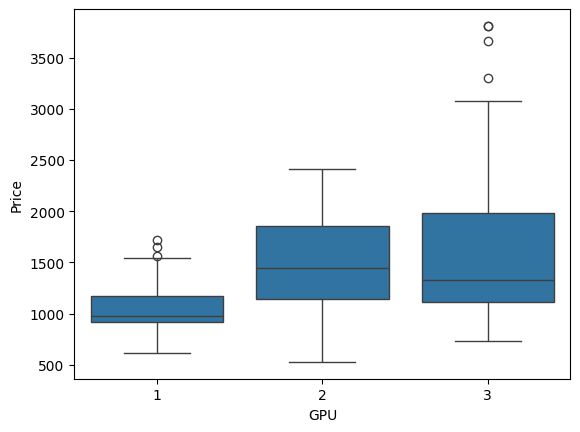

In [18]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x=A.gpu, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<Axes: xlabel='OS', ylabel='Price'>

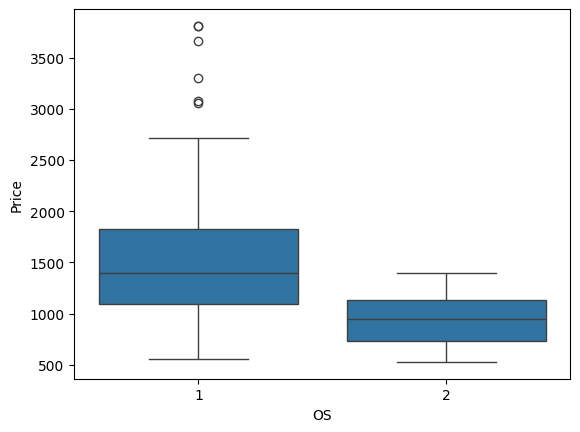

In [19]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x=A.os, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<Axes: xlabel='CPU_core', ylabel='Price'>

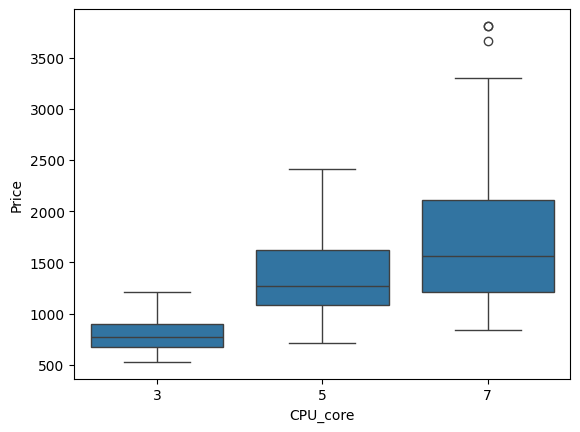

In [20]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x=A.cpu_core, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<Axes: xlabel='RAM_GB', ylabel='Price'>

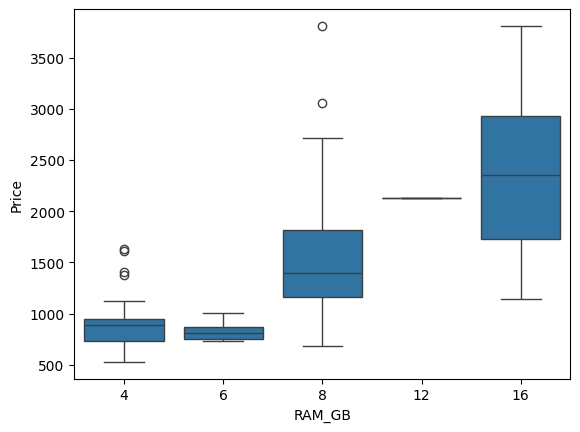

In [21]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x=A.ram_gb, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

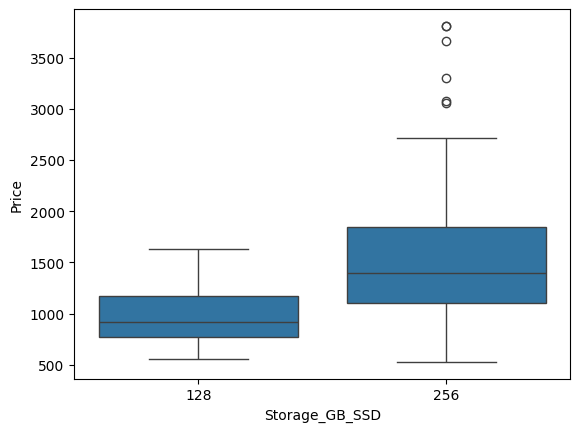

In [22]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x=A.storage_gb_ssd, y=A.price, data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Genere la descripción estadística de todas las características que se utilizan en el conjunto de datos.Incluya tipos de datos "Object" también.

In [23]:
# Write your code below and press Shift+Enter to execute
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [27]:
# Write your code below and press Shift+Enter to execute
# Create the group

copy1 =  df[[A.gpu, A.cpu_core, A.price]]

group1 = copy1.groupby([A.gpu,A.cpu_core], as_index=False).mean()
group1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [29]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table

pivot1 = group1.pivot(index=A.gpu, columns=A.cpu_core)
pivot1

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


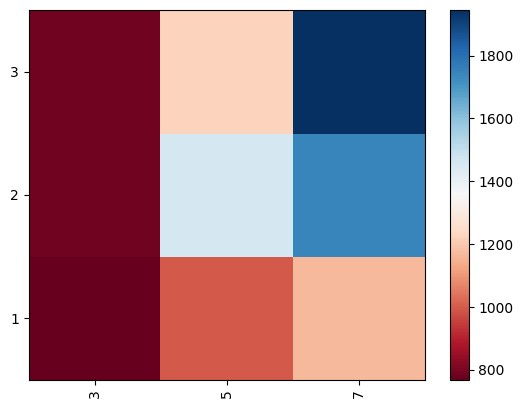

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot1, cmap='RdBu')

#label names
row_labels = pivot1.columns.levels[1]
col_labels = pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values
Use la función `scipy.stats.pearsonr ()` para evaluar el coeficiente de Pearson y los valores p para cada parámetro probado anteriormente.Esto lo ayudará a determinar los parámetros con más probabilidades de tener un fuerte efecto en el precio de las computadoras portátiles.

In [34]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])

    print( param, "::: ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB :::  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.681560628842973e-20
CPU_frequency :::  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713219e-09
Storage_GB_SSD :::  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191723976
Screen_Size_inch :::  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.0885339784683062
Weight_pounds :::  Weight_pounds  is -0.05031225837751551  with a P-value of P = 0.43976938534338894
CPU_core :::  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009359e-14
OS :::  OS  is -0.22172980114827384  with a P-value of P = 0.000569664255924674
GPU :::  GPU  is 0.28829819888814273  with a P-value of P = 6.166949698364437e-06
Category :::  Category  is 0.2862427558126413  with a P-value of P = 7.225696235806605e-06


<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
